In [ ]:
!pip install pandas matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/Thesis Asset/model outputs.csv')

# Display the first few rows
df.head()

,Task Name,Output Valid?,Model Type,Syntax OK?,Token Count,Output Length (Lines),Time Taken (sec),Notes,Input,Provided Output
0,Button Click Logging,Yes,Fine-tuned,Yes,102,7,13.17 tok/sec,NaN,Add a click event listener to a button with ID...,Here is an example of how you can add a click ...
1,Button Click Logging,Yes,Base,Yes,57,4,13.26 tok/sec,NaN,Add a click event listener to a button with ID...,"<button id=""cta"">Click me</button>\n\n// Add c..."
2,Create & Append Element,Yes,Fine-tuned,Yes,142,7,12.06 tok/sec,NaN,Write JavaScript to create a new `<div>` with ...,Here is an example of how you can use JavaScri...
3,Create & Append Element,No,Base,Yes,93,8,12.24 tok/sec,Did not write 50% of in the div instead it out...,Write JavaScript to create a new `<div>` with ...,// Create new sale-banner div\nconst saleBanne...
4,Dynamic Class Toggle,Yes,Fine-tuned,Yes,151,11,12.19 tok/sec,NaN,"Toggle the class ""active"" on an element with I...",Here is an example of how you can toggle the c...


In [ ]:
df['Accuracy'] = df['Output Valid?'].map({'Yes': 1, 'No': 0})
df['Syntax_Validity'] = df['Syntax OK?'].map({'Yes': 1, 'No': 0})

# Show the updated dataframe
df.head()

,Task Name,Output Valid?,Model Type,Syntax OK?,Token Count,Output Length (Lines),Time Taken (sec),Notes,Input,Provided Output,Accuracy,Syntax_Validity
0,Button Click Logging,Yes,Fine-tuned,Yes,102,7,13.17 tok/sec,NaN,Add a click event listener to a button with ID...,Here is an example of how you can add a click ...,1,1.0
1,Button Click Logging,Yes,Base,Yes,57,4,13.26 tok/sec,NaN,Add a click event listener to a button with ID...,"<button id=""cta"">Click me</button>\n\n// Add c...",1,1.0
2,Create & Append Element,Yes,Fine-tuned,Yes,142,7,12.06 tok/sec,NaN,Write JavaScript to create a new `<div>` with ...,Here is an example of how you can use JavaScri...,1,1.0
3,Create & Append Element,No,Base,Yes,93,8,12.24 tok/sec,Did not write 50% of in the div instead it out...,Write JavaScript to create a new `<div>` with ...,// Create new sale-banner div\nconst saleBanne...,0,1.0
4,Dynamic Class Toggle,Yes,Fine-tuned,Yes,151,11,12.19 tok/sec,NaN,"Toggle the class ""active"" on an element with I...",Here is an example of how you can toggle the c...,1,1.0


In [ ]:
# Clean Token Count and Time Taken (if needed)
df['Token Count'] = pd.to_numeric(df['Token Count'], errors='coerce')
df['Time Taken (sec)'] = pd.to_numeric(df['Time Taken (sec)'].str.extract(r'(\d+\.?\d*)')[0], errors='coerce')

# Show cleaned columns
df[['Task Name', 'Model Type', 'Token Count', 'Time Taken (sec)']].head()

,Task Name,Model Type,Token Count,Time Taken (sec)
0,Button Click Logging,Fine-tuned,102,13.17
1,Button Click Logging,Base,57,13.26
2,Create & Append Element,Fine-tuned,142,12.06
3,Create & Append Element,Base,93,12.24
4,Dynamic Class Toggle,Fine-tuned,151,12.19


In [ ]:
# We don’t have detailed partial match data, so use Accuracy as a proxy for Precision Score
df['Precision_Score'] = df['Accuracy']

# Show update
df[['Task Name', 'Model Type', 'Precision_Score']].head()

,Task Name,Model Type,Precision_Score
0,Button Click Logging,Fine-tuned,1
1,Button Click Logging,Base,1
2,Create & Append Element,Fine-tuned,1
3,Create & Append Element,Base,0
4,Dynamic Class Toggle,Fine-tuned,1


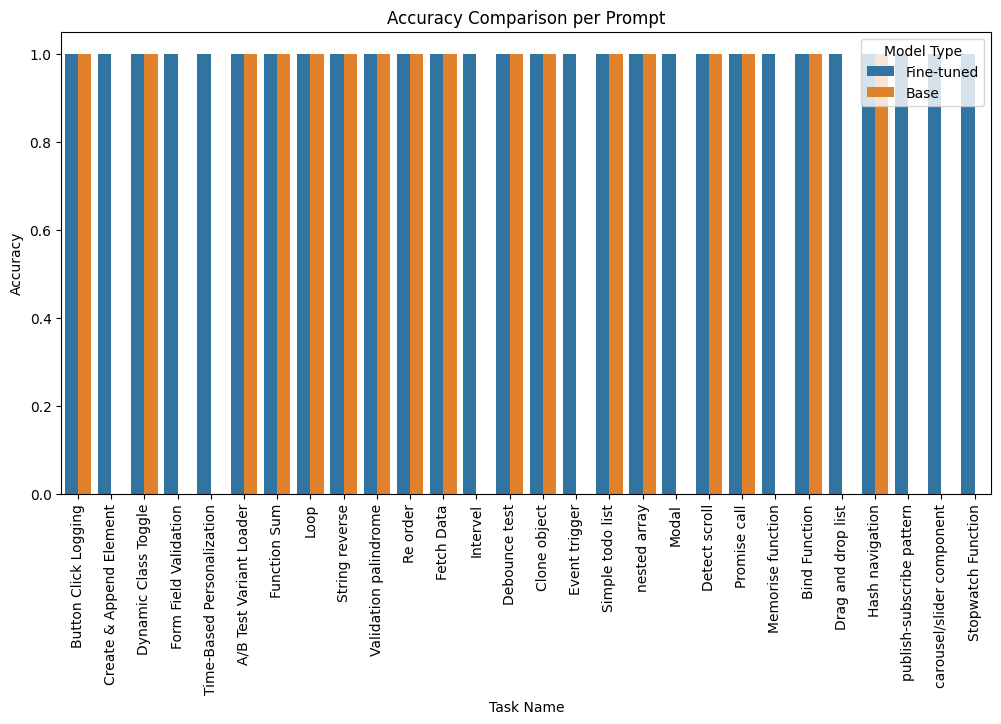

In [ ]:
# Bar chart of accuracy by prompt and model
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Task Name', y='Accuracy', hue='Model Type')
plt.title('Accuracy Comparison per Prompt')
plt.xticks(rotation=90)
plt.show()

In [ ]:
pivot_df = df.pivot(index='Task Name', columns='Model Type', values='Accuracy').fillna(0)

# Convert accuracy values to checkmark or crossmark
visual_df = pivot_df.applymap(lambda x: '✔️' if x == 1 else '❌')

# Display the table
from IPython.display import display
display(visual_df)

<ipython-input-19-fa29ded5038a>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  visual_df = pivot_df.applymap(lambda x: '✔️' if x == 1 else '❌')


Model Type,Base,Fine-tuned
Task Name,,
A/B Test Variant Loader,✔️,✔️
Bind Function,✔️,✔️
Button Click Logging,✔️,✔️
Clone object,✔️,✔️
Create & Append Element,❌,✔️
Debounce test,✔️,✔️
Detect scroll,✔️,✔️
Drag and drop list,❌,✔️
Dynamic Class Toggle,✔️,✔️


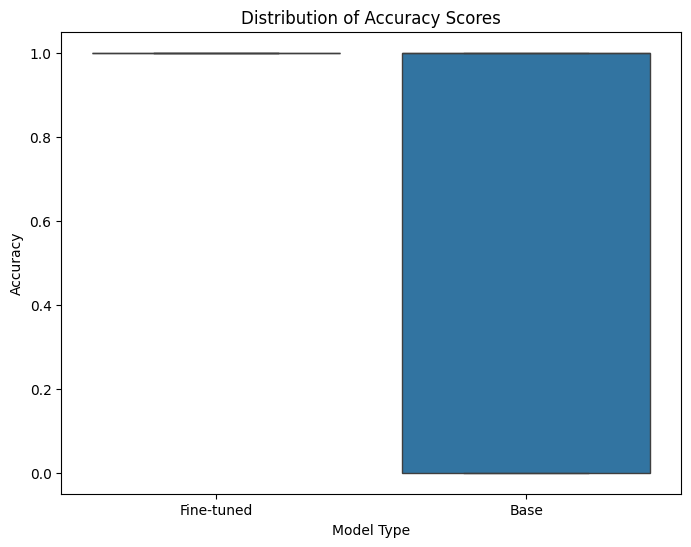

In [ ]:
# Use Accuracy as a stand-in for similarity
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Model Type', y='Accuracy')
plt.title('Distribution of Accuracy Scores')
plt.show()

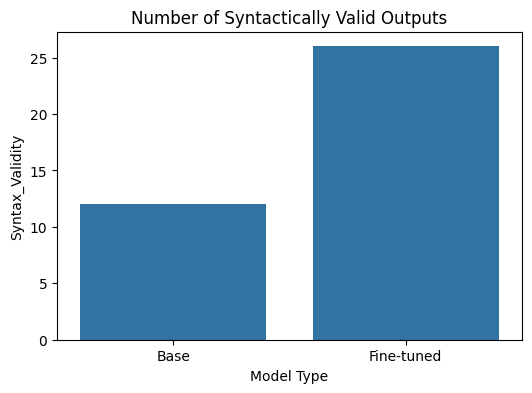

In [ ]:
# Bar chart for syntactic validity
syntax_counts = df.groupby('Model Type')['Syntax_Validity'].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=syntax_counts, x='Model Type', y='Syntax_Validity')
plt.title('Number of Syntactically Valid Outputs')
plt.show()

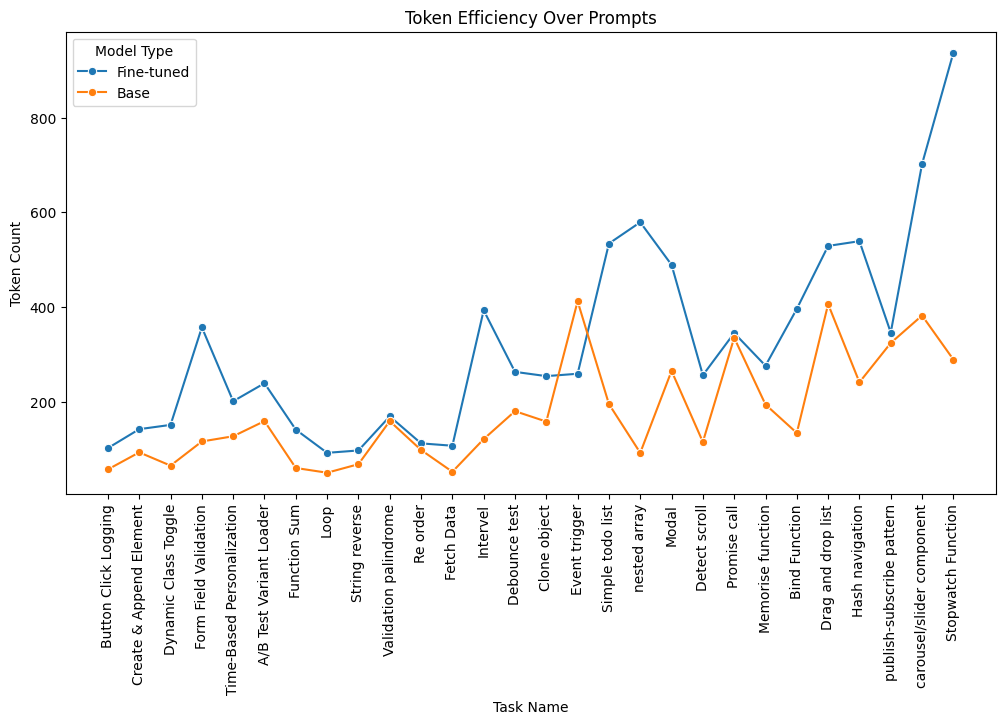

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Task Name', y='Token Count', hue='Model Type', marker='o')
plt.title('Token Efficiency Over Prompts')
plt.xticks(rotation=90)
plt.show()

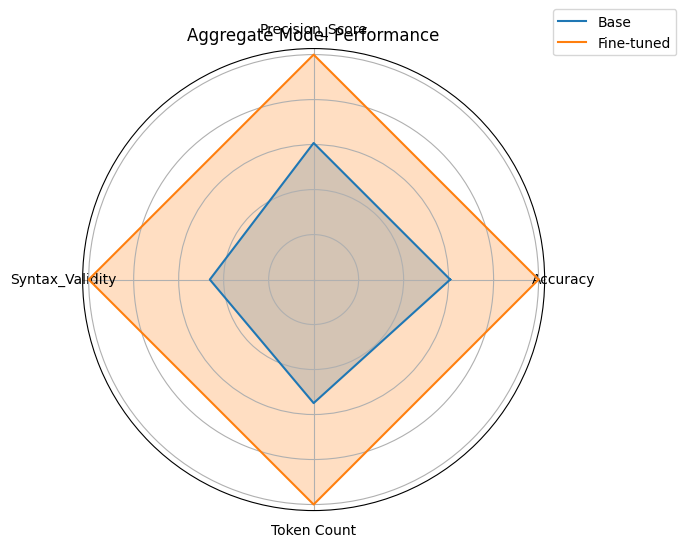

In [ ]:
# Calculate aggregate scores per model
agg_scores = df.groupby('Model Type').agg({
    'Accuracy': 'mean',
    'Precision_Score': 'mean',
    'Syntax_Validity': 'mean',
    'Token Count': 'mean'
}).reset_index()

# Normalize scores between 0-1
agg_norm = agg_scores.copy()
cols = ['Accuracy', 'Precision_Score', 'Syntax_Validity', 'Token Count']
for col in cols:
    agg_norm[col] = agg_norm[col] / agg_norm[col].max()

# Radar chart setup
import numpy as np

labels = cols
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, row in agg_norm.iterrows():
    values = row[cols].tolist()
    values += values[:1]
    ax.plot(angles, values, label=row['Model Type'])
    ax.fill(angles, values, alpha=0.25)

ax.set_title('Aggregate Model Performance')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

In [ ]:
# Calculate Cohen's d for the accuracy difference
# Rule of thumb: 0.2 = small, 0.5 = medium, 0.8 = large.
base_acc  = df[df['Model Type']=='Base']['Accuracy']
fine_acc  = df[df['Model Type']=='Fine-tuned']['Accuracy']

# Pooled standard deviation
pooled_std = np.sqrt(((base_acc.var(ddof=1) + fine_acc.var(ddof=1)) / 2))
cohens_d   = (fine_acc.mean() - base_acc.mean()) / pooled_std
print(f"Cohen's d = {cohens_d:.3f}")

Cohen's d = 1.117


In [ ]:
import scipy.stats as stats

mean_diff = fine_acc.mean() - base_acc.mean()
se_diff   = np.sqrt(fine_acc.var(ddof=1)/len(fine_acc) +
                    base_acc.var(ddof=1)/len(base_acc))
ci_low, ci_high = stats.t.interval(
    0.95,
    df=len(fine_acc)+len(base_acc)-2,
    loc=mean_diff,
    scale=se_diff
)
print(f"Mean accuracy diff = {mean_diff:.3f}")
print(f"95% CI: [{ci_low:.3f}, {ci_high:.3f}]")

Mean accuracy diff = 0.393
95% CI: [0.204, 0.581]


In [ ]:
from scipy.stats import shapiro, mannwhitneyu

print("Shapiro–Wilk p‑value (Base):", shapiro(base_acc)[1])
print("Shapiro–Wilk p‑value (Fine‑tuned):", shapiro(fine_acc)[1])

# If either p < 0.05, distributions deviate from normality → use Mann‑Whitney U
u_stat, p_mw = mannwhitneyu(base_acc, fine_acc, alternative='two-sided')
print("Mann–Whitney U p‑value:", p_mw)

Shapiro–Wilk p‑value (Base): 2.655520426865457e-07
Shapiro–Wilk p‑value (Fine‑tuned): 1.0
Mann–Whitney U p‑value: 0.0002574207614425796


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


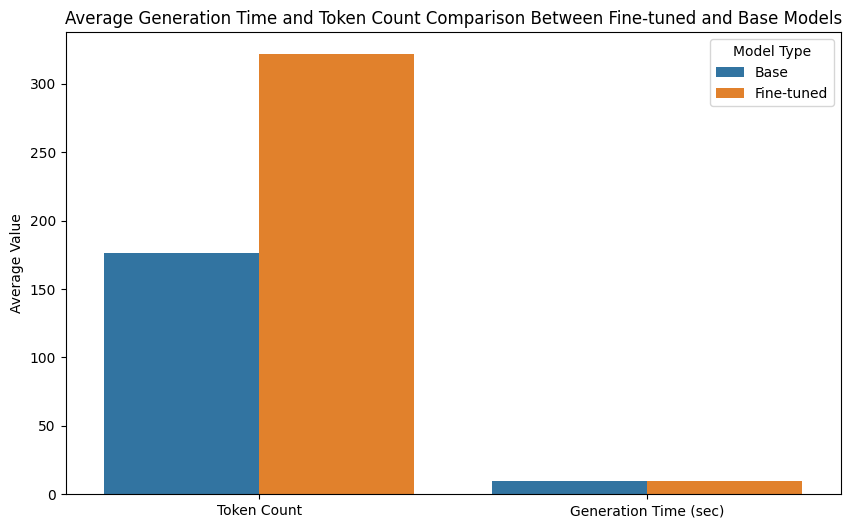

In [ ]:
# Group by Model Type and calculate averages
avg_df = df.groupby('Model Type').agg({
    'Token Count': 'mean',
    'Time Taken (sec)': 'mean'
}).reset_index()

# Rename column to match figure label
avg_df.rename(columns={'Time Taken (sec)': 'Generation Time (sec)'}, inplace=True)

# Reshape data for seaborn
avg_long = avg_df.melt(id_vars='Model Type',
                       value_vars=['Token Count', 'Generation Time (sec)'],
                       var_name='Metric',
                       value_name='Average Value')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_long, x='Metric', y='Average Value', hue='Model Type')
plt.title('Average Generation Time and Token Count Comparison Between Fine-tuned and Base Models')
plt.ylabel('Average Value')
plt.xlabel('')
plt.legend(title='Model Type')
plt.show()


ValueError: Could not interpret value `Generation Time (sec)` for `y`. An entry with this name does not appear in `data`.

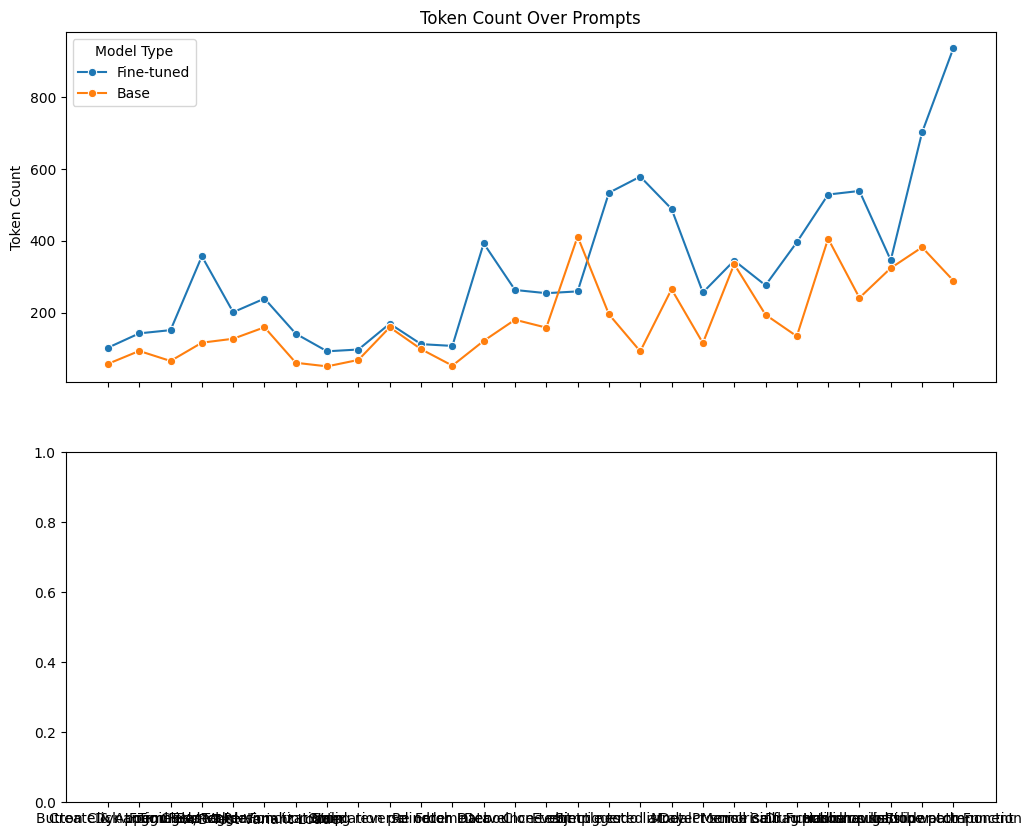

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

sns.lineplot(data=df, x='Task Name', y='Token Count', hue='Model Type', marker='o', ax=axes[0])
axes[0].set_title('Token Count Over Prompts')
axes[0].set_ylabel('Token Count')
axes[0].legend(title='Model Type')

sns.lineplot(data=df, x='Task Name', y='Generation Time (sec)', hue='Model Type', marker='o', ax=axes[1])
axes[1].set_title('Generation Time Over Prompts')
axes[1].set_ylabel('Generation Time (seconds)')
axes[1].set_xlabel('Task Name')
axes[1].legend(title='Model Type')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# Normalize metrics between 0-1
normalized_df = avg_df.copy()
normalized_df[['Token Count', 'Time Taken (sec)']] = normalized_df[['Token Count', 'Time Taken (sec)']] / normalized_df[['Token Count', 'Time Taken (sec)']].max()
# Syntax_Validity and Accuracy should already be 0–1

# Reshape
avg_long = normalized_df.melt(
    id_vars='Model Type',
    value_vars=['Token Count', 'Time Taken (sec)', 'Syntax_Validity', 'Accuracy'],
    var_name='Metric',
    value_name='Normalized Value'
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_long, x='Metric', y='Normalized Value', hue='Model Type', palette='colorblind')
plt.title('Composite Performance Summary (Normalized)')
plt.ylabel('Normalized Value (0–1)')
plt.xlabel('')
plt.legend(title='Model Type')
plt.tight_layout()
plt.show()



KeyError: "['Time Taken (sec)'] not in index"

In [ ]:
# Save cleaned dataset with computed columns
df.to_csv('cleaned_model_outputs.csv', index=False)
print("Exported cleaned dataset as 'cleaned_model_outputs.csv'")

Exported cleaned dataset as 'cleaned_model_outputs.csv'


In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(
    data=metrics_long,
    x='Task Name',
    y='Value',
    hue='Model Type',
    errorbar=None,
    palette='Set2'
)
plt.title('Accuracy and Syntax Validity Comparison Across Tasks')
plt.ylabel('Value (0–1)')
plt.xlabel('Task Name')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

g = sns.catplot(
    data=metrics_long,
    x='Task Name',
    y='Value',
    hue='Model Type',
    col='Metric',
    kind='bar',
    height=5,
    aspect=2,
    errorbar=None,
    palette='Set2'
)

g.set_xticklabels(rotation=60, ha='right')
g.set_axis_labels("Task Name", "Value (0–1)")
g.set_titles("{col_name}")
g.fig.suptitle('Accuracy and Syntax Validity Comparison Across Tasks', y=1.05)
plt.tight_layout()
plt.show()


NameError: name 'metrics_long' is not defined

<Figure size 1400x600 with 0 Axes>